In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from scipy.stats import skew
from scipy.stats import randint
from scipy.stats import uniform
from scipy import stats
import statsmodels.stats.api as sms


from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, ElasticNet, Ridge, ElasticNetCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import make_scorer 
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.impute import SimpleImputer

# neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import PredictionError

# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pd.set_option("display.max_rows", 200)

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
#Import data
input_file = "WMH_NAWM_116_nocoord_noNorm.csv"
df = pd.read_csv(input_file)
df_num = df._get_numeric_data()

print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
print("**Sample data:**")
df.head()


Number of rows in data = 4163
Number of columns in data = 1895


**Sample data:**


/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Age,Sex,HTN,DM,AF,CAD,Smoking_ever,Prior_stroke,Brain_volume,...,wavelet3-LL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet3-LL_gldm_LowGrayLevelEmphasis,wavelet3-LL_gldm_SmallDependenceEmphasis,wavelet3-LL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet3-LL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet3-LL_ngtdm_Busyness,wavelet3-LL_ngtdm_Coarseness,wavelet3-LL_ngtdm_Complexity,wavelet3-LL_ngtdm_Contrast,wavelet3-LL_ngtdm_Strength
0,100000001,60.052019,0,1,1,0,0,0,0,1889.641468,...,8.829282,0.138446,0.021684,0.149522,0.003683,527.839737,0.000091,1.089015,0.001439,0.000964
1,100000003,71.000000,1,1,0,0,0,0,0,1404.218582,...,8.743617,0.138837,0.021418,0.148993,0.003611,402.179258,0.000120,1.070461,0.001435,0.001264
2,100000005,80.000000,1,1,1,0,0,0,0,1180.874158,...,8.966454,0.147239,0.023129,0.155381,0.004048,597.670816,0.000117,0.765878,0.003530,0.000683
3,100000006,81.000000,1,1,0,0,0,1,0,1197.623311,...,8.821405,0.146222,0.023178,0.154733,0.004083,536.162870,0.000129,0.718352,0.003260,0.000747
4,100000007,74.000000,0,1,0,0,1,1,0,1545.277806,...,8.711348,0.137297,0.021177,0.147621,0.003558,606.855348,0.000107,0.622543,0.002283,0.000617


In [3]:
#Import data
full_phenotype = "included_withclinical.csv"
full_phenotype_df = pd.read_csv(full_phenotype)
full_phenotype_df.head()

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,3,8,12,14,15,16,23,27,28,30,31,32,33,34,35,37,39,41,43,44,49,50,51,54,55,73,74,76,84,85,89,90,95,100,113,114,116,117,119,158,159,160,161,163,164,165,171,182,197,200,201,206,210,211,212,221,222,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Subject_ID,included,ACALeftOcclusion,ACARightOcclusion,AF,ANY_Infratentorial_LEFT,ANY_Infratentorial_lesion,ANY_Infratentorial_lesion_RIGHT,ANY_PCA,ANY_PCA_LEFT,...,WASHU_MASTER_confirmed_stroke,WASHU_MASTER_notes,WASHU_MASTER_prior_CVA,WMHV,WMH_outlier,WMH_volume,WMHv6,WMHv_auto,WMHv_man,Wmh_methods_paper
0,100000001,1,Open,Open,0.0,0.0,1.0,1.0,0,0.0,...,NaN,NaN,NaN,NaN,0,12.459944,NaN,12.459945,NaN,1.0
1,100000003,1,Open,Open,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0,39.192430,39.192425,39.192425,NaN,1.0
2,100000005,1,Open,Open,0.0,1.0,1.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0,29.662121,29.662117,29.662117,NaN,1.0
3,100000006,1,Open,Open,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0,8.353831,8.353831,8.353831,NaN,1.0
4,100000007,1,Open,Open,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0,5.857984,5.857983,5.857983,NaN,1.0


In [282]:
outcomes_SH = 'MRIGENIE_VRF_NIHSS_triMRS_3m_6m.csv'
outcomes_SH_df = pd.read_csv(outcomes_SH)
outcomes_SH_df = outcomes_SH_df.drop('Unnamed: 0',axis=1).set_index('ID')

In [4]:
full_phenotype_df = full_phenotype_df.set_index('Subject_ID')
NIHSS_df = full_phenotype_df.NIHSS

In [5]:
NIHSS_df_noNa = NIHSS_df.dropna()

In [6]:
NIHSS_df_noNa

Subject_ID
304085501      3.0
304985271      3.0
306808367      1.0
306862528      6.0
307879933      5.0
              ... 
4400001641     1.0
4400001643     0.0
4400001651    10.0
4400001652     1.0
4400001654     1.0
Name: NIHSS, Length: 2234, dtype: float64

In [7]:
X = df_num.drop(['ID','Label',
'WMH_volume',
'WMH_Bvadj',
'Brain_volume',
'Ventricle_volume',
'No_csf_brain_vol',
#'AF',
#'Age',
#'DM',
#'HTN',
#'CAD',
#'Sex',
#'Smoking_ever',
                 ],axis = 1)

# Dropping surface and volume confounding variables
#X = X.drop(X.filter(regex='_Surface').columns, axis=1)
#X = X.drop(X.filter(regex='_Voxel').columns, axis=1)
#X = X.drop(X.filter(regex='_Volume').columns, axis=1)
#X = X.drop(X.filter(regex='_shape').columns, axis=1)


#Selecting filtered variables
#X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
#X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

#X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='square').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma').columns, axis=1)

X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='original').columns, axis=1)
#X = X.drop(X.filter(regex='diagnostics').columns, axis=1)
   

# Dropping heavily volume confounded variables
#X = X.drop(X.filter(regex='_RootMeanSquared').columns, axis=1)
#X = X.drop(X.filter(regex='_Energy').columns, axis=1)
#X = X.drop(X.filter(regex='_TotalEnergy').columns, axis=1)
#X = X.drop(X.filter(regex='_Coarseness').columns, axis=1)
#X = X.drop(X.filter(regex='Emphasis').columns, axis=1)
#X = X.drop(X.filter(regex='Uniformity').columns, axis=1)
#X = X.drop(X.filter(regex='Strength').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='ZoneVariance').columns, axis=1)
#X = X.drop(X.filter(regex='Busyness').columns, axis=1)


#X = X.drop(X.filter(regex='firstorder').columns, axis=1)
#X = X.drop(X.filter(regex='glcm').columns, axis=1)
#X = X.drop(X.filter(regex='gldm').columns, axis=1)
#X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
#X = X.drop(X.filter(regex='glrlm').columns, axis=1)
#X = X.drop(X.filter(regex='glszm').columns, axis=1)

#X = X.drop(X.filter(regex='Volume').columns, axis=1)

#X = X.drop(X.filter(regex='Maximum').columns, axis=1)
##X = X.drop(X.filter(regex='Sphericity').columns, axis=1)
#X = X.drop(X.filter(regex='Length').columns, axis=1)
#X = X.drop(X.filter(regex='Elongation').columns, axis=1)
#X = X.drop(X.filter(regex='Flatness').columns, axis=1)




y = df_num.WMH_Bvadj
for var in X:
    print(var)
print(X.shape)

Age
Sex
HTN
DM
AF
CAD
Smoking_ever
Prior_stroke
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Image-interpolated_Mean
diagnostics_Image-interpolated_Minimum
diagnostics_Image-interpolated_Maximum
diagnostics_Mask-interpolated_VoxelNum
diagnostics_Mask-interpolated_VolumeNum
diagnostics_Mask-interpolated_Mean
diagnostics_Mask-interpolated_Minimum
diagnostics_Mask-interpolated_Maximum
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_Maximum3DDiameter
original_shape_MeshVolume
original_shape_MinorAxisLength
original_shape_Sphericity
original_shape_SurfaceArea
original_shape_SurfaceVolumeRatio
original_shape_VoxelVolume
original_firstorder_10Percentile
original_firs

In [8]:
df_num.WMH_volume.describe()

count    4163.000000
mean        8.568140
std        11.217209
min         0.001984
25%         1.391192
50%         4.190285
75%        11.212255
max        82.098237
Name: WMH_volume, dtype: float64

split an external set to select features before testing prediction

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.9s finished


alpha in fold 0: 0.001444587448286327
selected features: 154/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.4s finished


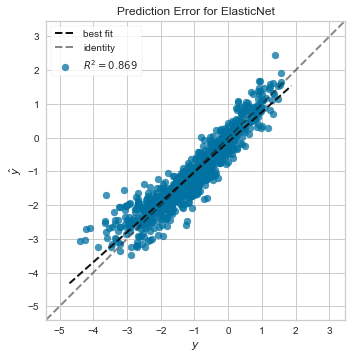

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    5.9s finished


alpha in fold 1: 0.0014360772157965918
selected features: 146/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.3s finished


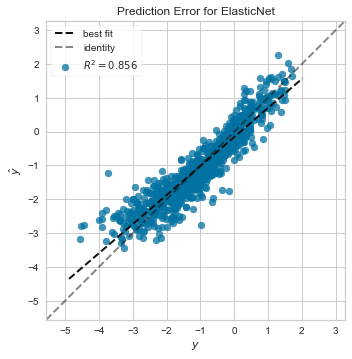

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    7.6s finished


alpha in fold 2: 0.001442652412050274
selected features: 149/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.5s finished


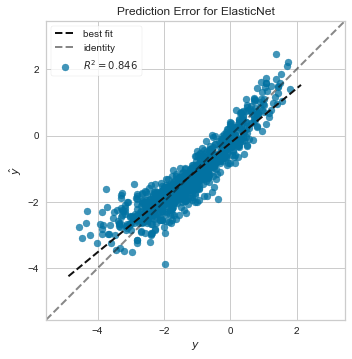

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.9s finished


alpha in fold 3: 0.0014030681348325307
selected features: 164/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.7s finished


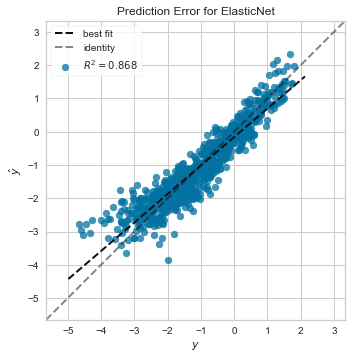

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    7.8s finished


alpha in fold 4: 0.00142134290164403
selected features: 146/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.0s finished


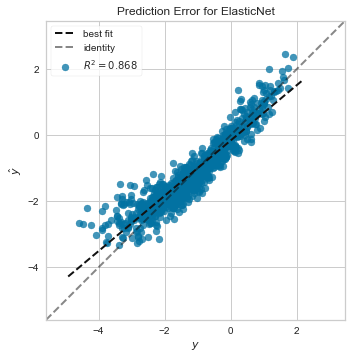

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    5.8s finished


alpha in fold 5: 0.001460092490938528
selected features: 141/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.1s finished


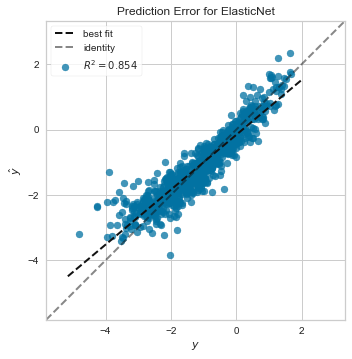

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.7s finished


alpha in fold 6: 0.0014254480747880592
selected features: 149/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.4s finished


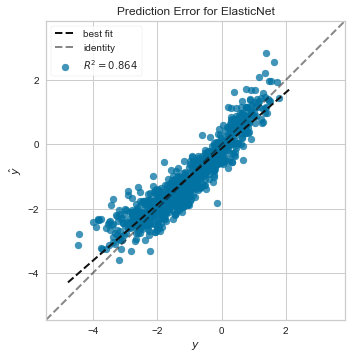

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.5s finished


alpha in fold 7: 0.0015564228986220167
selected features: 147/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.1s finished


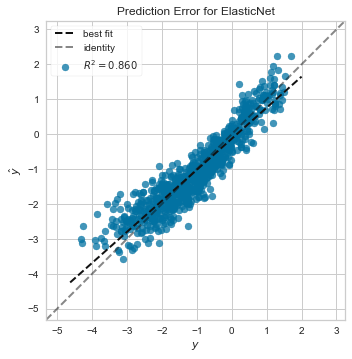

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.8s finished


alpha in fold 8: 0.0013960295529086173
selected features: 154/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.3s finished


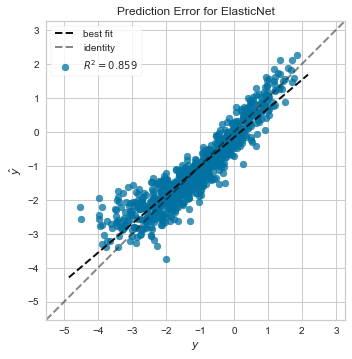

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.5s finished


alpha in fold 9: 0.001413433516691301
selected features: 150/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.2s finished


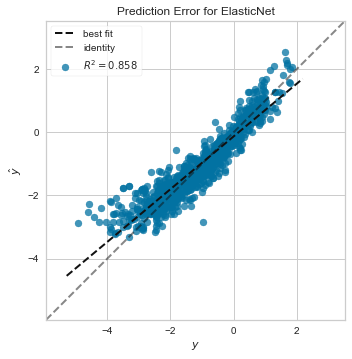

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.1s finished


alpha in fold 10: 0.0015344669418688288
selected features: 141/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.2s finished


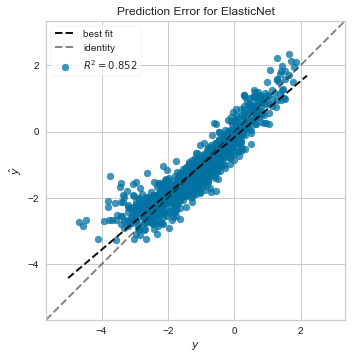

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.9s finished


alpha in fold 11: 0.0014077829479859152
selected features: 147/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.1s finished


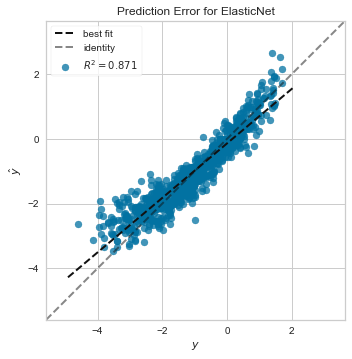

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.5s finished


alpha in fold 12: 0.0014428768748568964
selected features: 158/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.0s finished


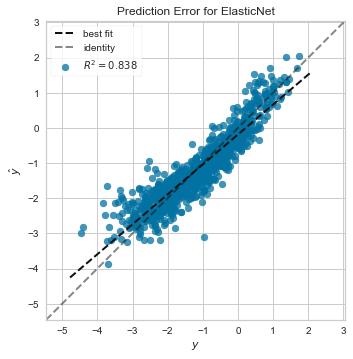

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.6s finished


alpha in fold 13: 0.001446449613638642
selected features: 152/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.3s finished


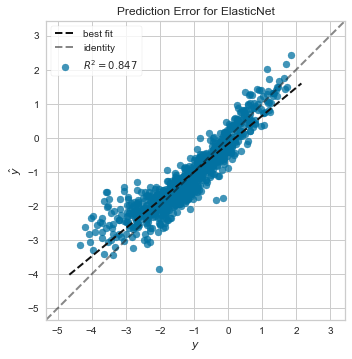

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.1s finished


alpha in fold 14: 0.0014382341757069362
selected features: 153/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    0.8s finished


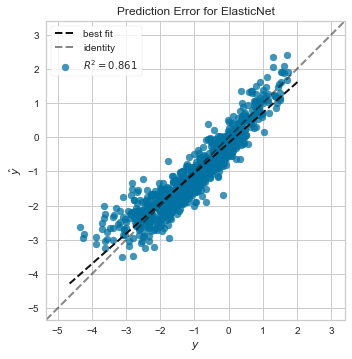

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    5.9s finished


alpha in fold 15: 0.0014437995302112633
selected features: 154/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.2s finished


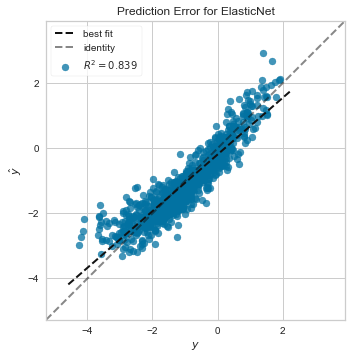

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.2s finished


alpha in fold 16: 0.001406514666550235
selected features: 151/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.3s finished


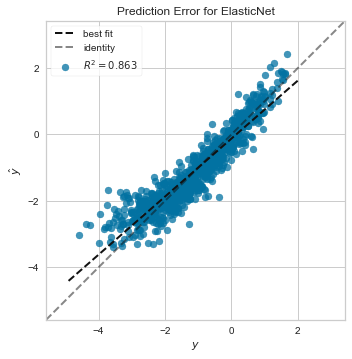

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.3s finished


alpha in fold 17: 0.0014148477686130004
selected features: 151/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.3s finished


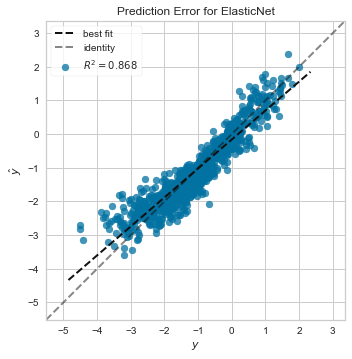

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    7.2s finished


alpha in fold 18: 0.001368371031956539
selected features: 148/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.2s finished


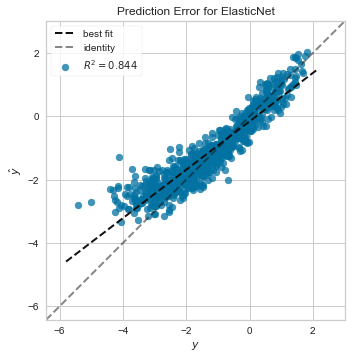

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.2s finished


alpha in fold 19: 0.0014159843553802674
selected features: 143/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.1s finished


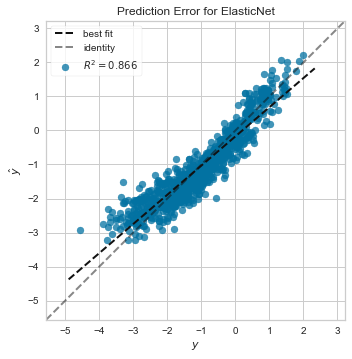

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.3s finished


alpha in fold 20: 0.0014481181415003522
selected features: 151/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    2.0s finished


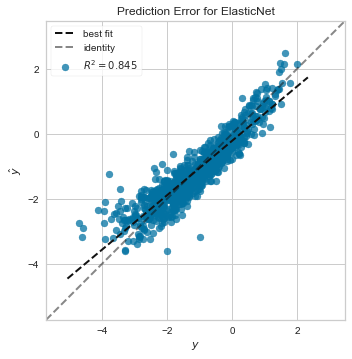

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    7.4s finished


alpha in fold 21: 0.001397429847206031
selected features: 148/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.3s finished


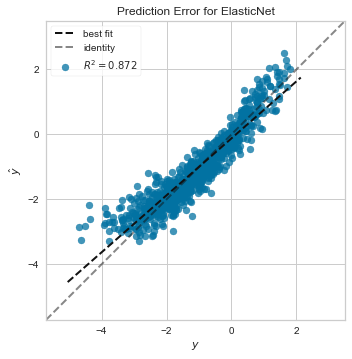

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.7s finished


alpha in fold 22: 0.0014463158240082886
selected features: 160/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.6s finished


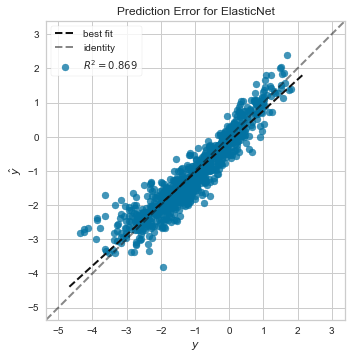

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    7.0s finished


alpha in fold 23: 0.0014194149965539515
selected features: 154/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.6s finished


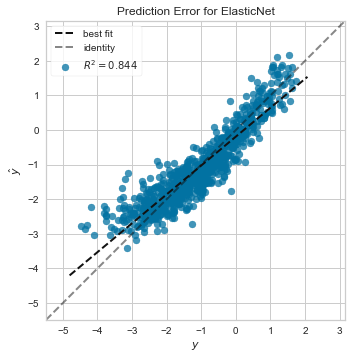

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.7s finished


alpha in fold 24: 0.0014549264501219795
selected features: 154/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.4s finished


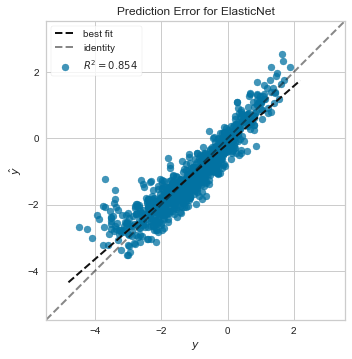

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.7s finished


alpha in fold 25: 0.001433866834435068
selected features: 145/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.5s finished


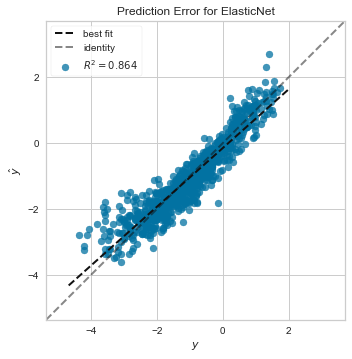

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    7.3s finished


alpha in fold 26: 0.0014042131379687882
selected features: 150/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.1s finished


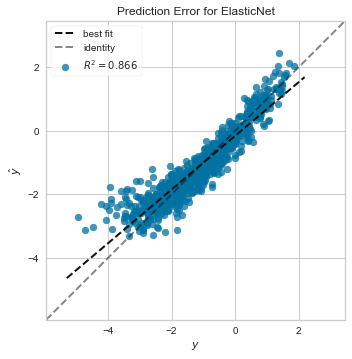

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.1s finished


alpha in fold 27: 0.0014136542692454763
selected features: 145/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.2s finished


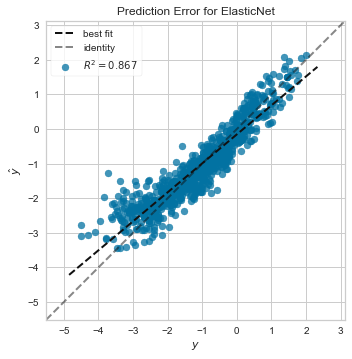

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    5.9s finished


alpha in fold 28: 0.0014550527752625391
selected features: 145/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    1.1s finished


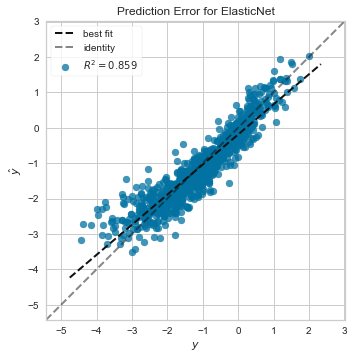

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    6.4s finished


alpha in fold 29: 0.001422012903524953
selected features: 160/763 total number of features


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=64)]: Done   5 out of   5 | elapsed:    2.0s finished


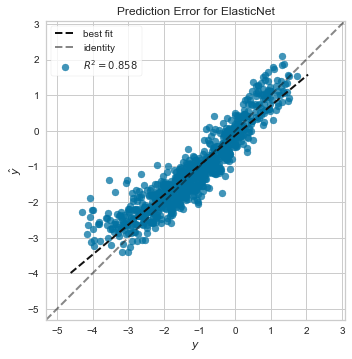

In [9]:
X = df_num.drop([#'ID',
                 'Label',
'WMH_volume',
'WMH_Bvadj',
'Brain_volume',
'Ventricle_volume',
'No_csf_brain_vol',
#'AF',
#'Age',
#'DM',
#'HTN',
#'CAD',
#'Sex',
#'Smoking_ever',
                 ],axis = 1)

# Dropping surface and volume confounding variables
#X = X.drop(X.filter(regex='_Surface').columns, axis=1)
#X = X.drop(X.filter(regex='_Voxel').columns, axis=1)
#X = X.drop(X.filter(regex='_Volume').columns, axis=1)
#X = X.drop(X.filter(regex='_shape').columns, axis=1)


#Selecting filtered variables
X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

#X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma').columns, axis=1)

X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='original').columns, axis=1)
#X = X.drop(X.filter(regex='diagnostics').columns, axis=1)
   

# Dropping heavily volume confounded variables
#X = X.drop(X.filter(regex='_RootMeanSquared').columns, axis=1)
#X = X.drop(X.filter(regex='_Energy').columns, axis=1)
#X = X.drop(X.filter(regex='_TotalEnergy').columns, axis=1)
#X = X.drop(X.filter(regex='_Coarseness').columns, axis=1)
#X = X.drop(X.filter(regex='Emphasis').columns, axis=1)
#X = X.drop(X.filter(regex='Uniformity').columns, axis=1)
#X = X.drop(X.filter(regex='Strength').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='ZoneVariance').columns, axis=1)
#X = X.drop(X.filter(regex='Busyness').columns, axis=1)


#X = X.drop(X.filter(regex='firstorder').columns, axis=1)
#X = X.drop(X.filter(regex='glcm').columns, axis=1)
#X = X.drop(X.filter(regex='gldm').columns, axis=1)
#X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
#X = X.drop(X.filter(regex='glrlm').columns, axis=1)
#X = X.drop(X.filter(regex='glszm').columns, axis=1)

#X = X.drop(X.filter(regex='Volume').columns, axis=1)

#X = X.drop(X.filter(regex='Maximum').columns, axis=1)
##X = X.drop(X.filter(regex='Sphericity').columns, axis=1)
#X = X.drop(X.filter(regex='Length').columns, axis=1)
#X = X.drop(X.filter(regex='Elongation').columns, axis=1)
#X = X.drop(X.filter(regex='Flatness').columns, axis=1)




y = df_num.WMH_Bvadj

columns_names = X.columns.drop('ID')

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
#scaler = RobustScaler()
scaler=StandardScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64)
y_pred_total_both=[]
y_total_both =[]
r2_total_both=[]
index_total = []
all_selected_features =[]
coefs_both=pd.DataFrame(index=df_num.columns)

repeated=30
for i in range(repeated):
    #split train test
    
    y_len = y.shape[-1]
    bins = np.linspace(0, y_len, 50)
    y_binned = np.digitize(y, bins)
    X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=i,stratify=y_binned)

    y_len2 = y_training.shape[-1]
    bins2 = np.linspace(0, y_len, 50)
    y_binned2 = np.digitize(y_training, bins)
    X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

    #set index 
    X_training=X_training.set_index('ID')
    X_test=X_test.set_index('ID')
    X_final=X_final.set_index('ID')
    index_training=X_training.index
    index_test = X_test.index
    index_final = X_final.index
    
    #impute data
    X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names,index=index_training)
    X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names,index= index_test)
    X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names,index=index_final)
    #box cox transform y
    y_training, _ = stats.boxcox(y_training)
    y_test, _ = stats.boxcox(y_test)
    y_final, _ = stats.boxcox(y_final)
    

    #scale units     
    X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names,index=index_training)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names,index=index_test)
    X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names,index=index_final)

    
    #feature selection using ElasticNetCV
    lassoCV.fit(X_training,y_training)
    selector = SelectFromModel(lassoCV,prefit=True)
    print('alpha in fold {0}: {1}'.format(i,lassoCV.alpha_))
    selected_feat = X_training.columns[(selector.get_support())]
    all_selected_features.append(selected_feat)
    print('selected features: {0}/{1} total number of features'.format(len(selected_feat),(X_training.shape[1])))
    X_training_sel = X_training.filter(selected_feat)
    X_test_sel = X_test.filter(selected_feat)
    X_final_sel = X_final.filter(selected_feat)
    
          #tuning on test set
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_
    
    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)
          
          #scoring on final set
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    
    #prepare plots
    y_pred_infold=lasso_reg.predict(X_final_sel)
    ID_pred_infold=index_final
    index_total.extend(index_final)
    y_pred_total_both.extend(y_pred_infold)
    y_total_both.extend(y_final)
    r2_total_both.append(visualizer.score_)  
    
    #prepare coefs
    counter=[i]
    coef_infold=pd.DataFrame(lasso_reg.coef_,index=X_training_sel.columns,columns=counter)
    coefs_both=coefs_both.join(coef_infold)

coefs_both_nona=coefs_both.dropna().T
r2_total_both=np.array(r2_total_both)
    

Get all predictions with ID to check with clinical (NIHSS)

In [48]:
y_pred_columns = ['y_pred_both']
df_y_pred_both=pd.DataFrame(y_pred_total_both,columns=y_pred_columns,index=index_total)
df_y_pred_both.index=df_y_pred_both.index.set_names('ID')

y_total_columns = ['y_true']
df_y_true_both=pd.DataFrame(y_total_both,columns=y_total_columns,index=index_total)
df_y_true_both.index=df_y_true_both.index.set_names('ID')

y_ground_truth_both_np = np.array(y_total_both)
y_pred_total_both_np = np.array(y_pred_total_both)
y_residual_both = y_pred_total_both_np - y_ground_truth_both_np
residual_both_columns = ['residual_both']
df_y_residual_both=pd.DataFrame(y_residual_both,columns=residual_both_columns,index=index_total)
df_y_residual_both.index=df_y_residual_both.index.set_names('ID')

predictions_both_df=pd.concat([df_y_pred_both,df_y_true_both,df_y_residual_both],axis=1)

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler100perc = MinMaxScaler(feature_range=(0,100))
Brain_health_perc = pd.DataFrame(predictions_both_df.y_pred_both,index=predictions_both_df.index)
Brain_health_perc = pd.DataFrame(scaler100perc.fit_transform(Brain_health_perc),columns=['Brain_health'],index=Brain_health_perc.index)
Brain_health_perc.Brain_health = (100 - Brain_health_perc.Brain_health)

In [114]:
Brain_health_perc

,Brain_health
ID,
100000001,52.041880
100000001,51.643700
100000001,52.046065
100000001,52.501638
100000001,52.379532
...,...
4400001654,50.199827
4400001654,50.300052
4400001654,47.764045


In [135]:
Brain_health_average = pd.DataFrame(columns=Brain_health_perc.columns,index=Brain_health_perc.index.unique())
for index in Brain_health_perc.index:
    Brain_health_average.loc[index]=Brain_health_perc.loc[index].mean()

In [148]:
df_num_index = df_num.set_index('ID')

In [149]:
prediction_both_average = pd.DataFrame(columns=predictions_both_df.columns,index=predictions_both_df.index.unique())
for index in prediction_both_average.index:
    for columns in predictions_both_df:
        prediction_both_average.loc[index,columns]=predictions_both_df.loc[index,columns].mean()
    prediction_both_average.loc[index,'WMH_volume']=df_num_index.loc[index,'WMH_volume']

In [150]:
prediction_both_average = pd.concat([prediction_both_average,Brain_health_average],axis=1)

In [156]:
prediction_both_average_copy = prediction_both_average

In [157]:
prediction_both_average.to_csv('Brain_health_preds.csv')

In [183]:
df_brain_health = prediction_both_average.merge(df_num_index,how='left',left_index=True,
                                      right_index=True)

In [288]:
test = prediction_both_average.merge(outcomes_SH_df,how='left',left_index=True,
                                      right_index=True).drop('Day triMRS',axis=1).dropna().merge(df_num_index,how='left',left_index=True,
                                      right_index=True)

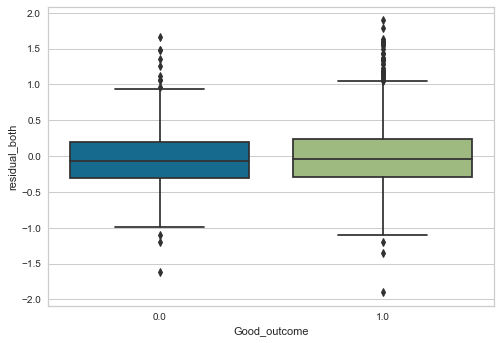

In [285]:
sns.boxplot(x='Good_outcome',y='residual_both',data=test)

In [347]:
for var in test:
    print(var)

y_pred_both
y_true
residual_both
NIHSS_x
WMH_volume_x
Brain_health
Site
SiteName
Age_x
Sex(F)
CAD_x
DM_x
HTN_x
AF_x
Smoking
PriorStroke
NIHSS_y
triMRS
Good_outcome
Age_y
Sex
HTN_y
DM_y
AF_y
CAD_y
Smoking_ever
Prior_stroke
Brain_volume
No_csf_brain_vol
Ventricle_volume
WMH_Bvadj
WMH_volume_y
Label
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Image-interpolated_Mean
diagnostics_Image-interpolated_Minimum
diagnostics_Image-interpolated_Maximum
diagnostics_Mask-interpolated_VoxelNum
diagnostics_Mask-interpolated_VolumeNum
diagnostics_Mask-interpolated_Mean
diagnostics_Mask-interpolated_Minimum
diagnostics_Mask-interpolated_Maximum
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice


In [348]:
sns.histplot(data=test,'original_glrlm_LongRunEmphasis')

SyntaxError: positional argument follows keyword argument (<ipython-input-348-a1b38ab99353>, line 1)

In [343]:
import statsmodels.api as sm
y_outcome = test.Good_outcome.to_numpy()
#WMH_bvadj_np, _ = stats.boxcox(test.WMH_Bvadj.to_numpy())
WMH_bvadj_np = test.WMH_Bvadj.to_numpy()
sm_model = sm.Logit(y_outcome,WMH_bvadj_np).fit()
print(sm_model.summary())

Optimization terminated successfully.
         Current function value: 0.676944
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1868
Model:                          Logit   Df Residuals:                     1867
Method:                           MLE   Df Model:                            0
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                 -0.1506
Time:                        12:30:20   Log-Likelihood:                -1264.5
converged:                       True   LL-Null:                       -1099.0
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4241      0.058      7.330      0.000       0.311       0.537


In [344]:
np.exp(0.4241 )

1.528214407583998

In [345]:
Brainhealth_np = test.Brain_health.to_numpy().astype(float)
brainhealth_model = sm.Logit(y_outcome,Brainhealth_np).fit()
print(brainhealth_model.summary())

Optimization terminated successfully.
         Current function value: 0.572604
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1868
Model:                          Logit   Df Residuals:                     1867
Method:                           MLE   Df Model:                            0
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                 0.02672
Time:                        12:30:50   Log-Likelihood:                -1069.6
converged:                       True   LL-Null:                       -1099.0
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0174      0.001     19.612      0.000       0.016       0.019


In [342]:
np.exp(0.0174 )

1.0175522618366473

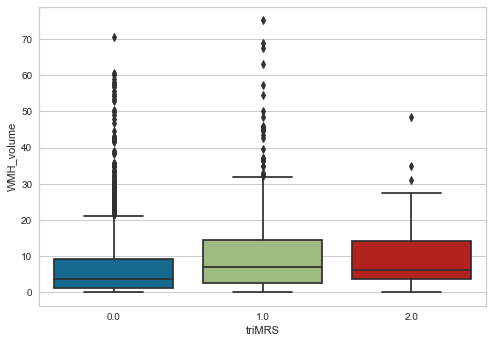

In [253]:
sns.boxplot(x='triMRS',y='WMH_volume',data=test)

In [184]:
df_brain_health.to_csv('Brain_health_df.csv')

In [191]:
clinical_brain_health=[
    'y_pred_both',
'y_true',
'residual_both',
'NIHSS',
'WMH_volume_x',
'Brain_health',
'Age',
'Sex',
'HTN',
'DM',
'AF',
'CAD',
'Smoking_ever',
'Prior_stroke',
'Brain_volume',
'No_csf_brain_vol',
'Ventricle_volume',
'WMH_Bvadj',
'WMH_volume_y',
]

In [224]:
df_brain_health_clinical = df_brain_health.filter(clinical_brain_health,axis=1)
df_brain_health_clinical.to_csv('df_brain_health_clinical.csv')

In [225]:
df_brain_health_clinical.describe()

,WMH_volume_x,Age,Sex,HTN,DM,AF,CAD,Smoking_ever,Prior_stroke,Brain_volume,No_csf_brain_vol,Ventricle_volume,WMH_Bvadj,WMH_volume_y
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000
mean,8.571039,62.806925,0.420154,0.678451,0.165224,0.143098,0.185426,0.319625,0.129389,1467.500014,1262.762960,33.516275,0.589010,8.571039
std,11.222246,15.046035,0.493643,0.467127,0.371427,0.350215,0.388689,0.466387,0.335670,159.522619,158.913507,20.185940,0.764598,11.222246
min,0.001984,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,927.934171,726.060142,0.000000,0.000142,0.001984
25%,1.391192,51.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1355.581171,1149.873448,18.866820,0.095145,1.391192
50%,4.188085,64.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1467.433378,1259.365460,31.820933,0.291235,4.188085
75%,11.213751,74.900000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1574.571543,1371.497968,42.580234,0.778408,11.213751
max,82.098237,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2132.480011,2008.840442,200.441112,5.634676,82.098237


In [226]:
resid_1sup = df_brain_health_clinical[df_brain_health_clinical.residual_both > 1]
resid_1inf = df_brain_health_clinical[df_brain_health_clinical.residual_both < 1]
WMH_Q1 = df_brain_health_clinical[df_brain_health_clinical.WMH_volume_x < 1.4]
WMH_Q4 = df_brain_health_clinical[df_brain_health_clinical.WMH_volume_x > 11.2]

In [236]:
WMH_Q4.to_csv('WMH_Q4.csv')
WMH_Q1.to_csv('WMH_Q1.csv')

In [228]:
WMH_Q1.mean()

y_pred_both           -2.280894
y_true                -2.639472
residual_both          0.358578
NIHSS                  4.317490
WMH_volume_x           0.621675
Brain_health          76.463356
Age                   50.473756
Sex                    0.448706
HTN                    0.499521
DM                     0.090125
AF                     0.065197
CAD                    0.091083
Smoking_ever           0.189837
Prior_stroke           0.093001
Brain_volume        1479.209171
No_csf_brain_vol    1304.108661
Ventricle_volume      22.665032
WMH_Bvadj              0.042625
WMH_volume_y           0.621675
dtype: float64

In [217]:
stats.spearmanr(df_brain_health_clinical.Ventricle_volume,df_brain_health_clinical.y_pred_both)

SpearmanrResult(correlation=0.5276853207938721, pvalue=7.003676014947532e-297)

In [216]:
stats.spearmanr(df_brain_health_clinical.Ventricle_volume,df_brain_health_clinical.y_true)

SpearmanrResult(correlation=0.4422783904097299, pvalue=1.0138684137829895e-198)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

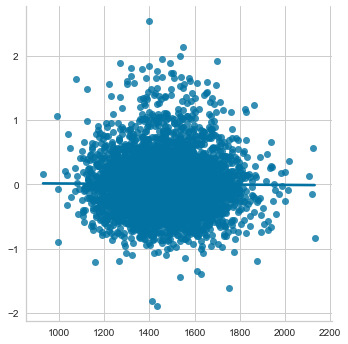

In [205]:
sns.lmplot(x='Brain_volume',y='residual_both',data=test)

AttributeError: 'DataFrame' object has no attribute 'Age'

In [49]:
NIHSS_df = full_phenotype_df.NIHSS
NIHSS_df.index=NIHSS_df.index.set_names('ID')
predictions_both_df=predictions_both_df.join(NIHSS_df)
predictions_both_NIHSS=predictions_both_df.dropna()
predictions_both_NIHSS.NIHSS=predictions_both_NIHSS.NIHSS.astype(int)

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


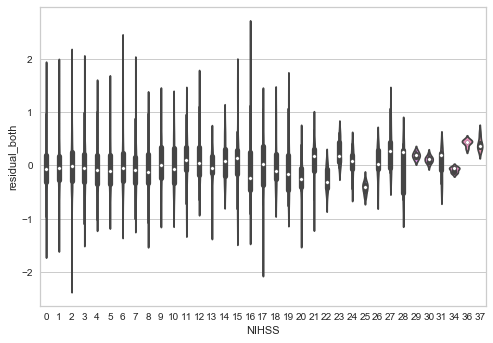

In [50]:
predictions_both_NIHSS.sort_values(by='NIHSS')
ax = sns.violinplot(x="NIHSS", y="residual_both", data=predictions_both_NIHSS,aspect=5)

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


number of CV repetitions: 30
R2 mean : 0.86 +/- 0.01
Confidence interval: 0.855 - 0.862


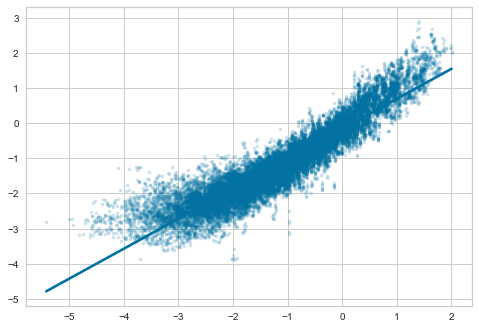

In [13]:

sns.regplot(y_total_both,y_pred_total_both,scatter_kws={'alpha':0.2},marker=".")
print('number of CV repetitions: {}'.format(i+1))
print('R2 mean : {0} +/- {1}'.format(round(r2_total_both.mean(),2),round(r2_total_both.std(),2)))
CI_long=sms.DescrStatsW(r2_total_both).tconfint_mean()


print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [14]:
X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20)
y_bc, lambda_bc = stats.boxcox(y_training)

,y_pred_both,y_true,residual_both,NIHSS
ID,,,,
100000001,-0.621298,-0.401077,-0.220222,NaN
100000001,-0.621298,-0.401077,-0.191650,NaN
100000001,-0.621298,-0.401077,-0.217671,NaN
100000001,-0.621298,-0.401077,-0.249473,NaN
100000001,-0.621298,-0.401077,-0.240924,NaN
...,...,...,...,...
4400001654,-0.556447,-0.379854,-0.117152,1.0
4400001654,-0.556447,-0.379854,-0.123646,1.0
4400001654,-0.556447,-0.379854,0.047649,1.0


In [17]:
y_total_both_Invbc = inv_boxcox(y_pred_total_both,lambda_bc)
y_total_both_Invbc

array([3.94041506, 0.00952514, 0.17854487, ..., 0.03627618, 0.56830725,
       0.06464501])

In [18]:
y_total_both_Invbc_df = pd.DataFrame(y_total_both_Invbc)
bc_df = pd.DataFrame(y_total_both)

In [19]:
y_total_both_Invbc_df=y_total_both_Invbc_df.join(bc_df, lsuffix='invvc',rsuffix='bc').sort_values(by=['0invvc'])
y_total_both_Invbc_df

,0invvc,0bc
2444,0.001994,-1.963633
10230,0.002105,-3.708119
11480,0.002161,-2.023916
4720,0.002161,-2.017149
2658,0.002205,-1.978466
...,...,...
9723,8.976922,1.376913
12566,9.118420,1.657076
21621,9.423643,1.403793
5022,10.216543,1.387359


In [20]:
y_total_both_Invbc_df.to_csv('inv_boxcoxvalues.csv')


/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


number of CV repetitions: 30
R2 mean : 0.86 +/- 0.01
Confidence interval: 0.855 - 0.862


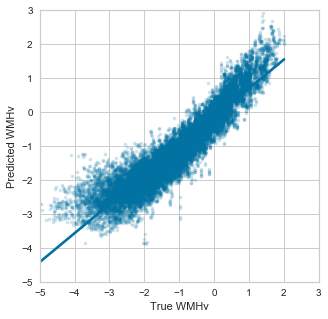

In [116]:

regplot = sns.regplot(y_total_both,y_pred_total_both,
            scatter_kws={'alpha':0.2},marker=".")
regplot.figure.set_size_inches(5, 5)
regplot.set(xlabel='True WMHv', ylabel='Predicted WMHv')
regplot.set(ylim=(-5, 3))
regplot.set(xlim=(-5, 3))

figure = regplot.get_figure()
figure.savefig('./CV_pred_WMHv_both_400dpi.png', dpi=400)


#sns.despine()

print('number of CV repetitions: {}'.format(i+1))
print('R2 mean : {0} +/- {1}'.format(round(r2_total_both.mean(),2),round(r2_total_both.std(),2)))
CI_long=sms.DescrStatsW(r2_total_both).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/cbook/__i

R2 mean : 0.858 +/- 0.0097
Confidence interval: 0.855 - 0.862


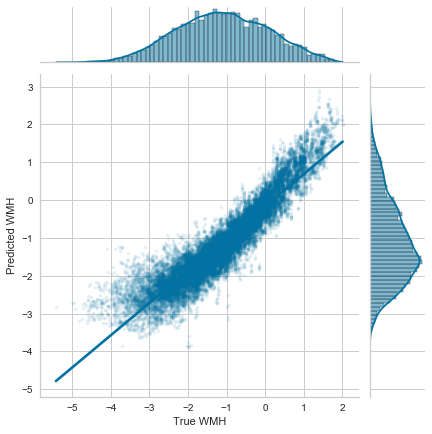

In [117]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
ax=sns.jointplot(y_total_both,y_pred_total_both, kind="reg", 
                 #stat_func=r2,
             scatter_kws={'alpha':0.1},marker="."
             )

ax.set_axis_labels("True WMH", "Predicted WMH")

print('R2 mean : {0} +/- {1}'.format(round(r2_total_both.mean(),3),round(r2_total_both.std(),4)))
CI_long=sms.DescrStatsW(r2_total_both).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


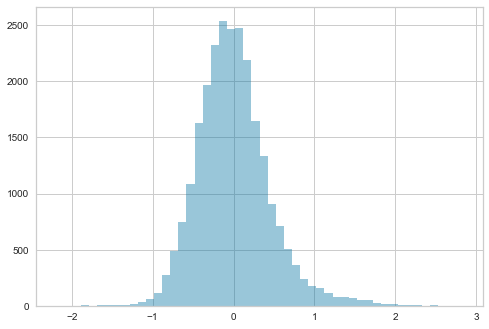

In [118]:
y_total_both_copy = y_total_both
y_pred_total_both_copy = y_pred_total_both


y_ground_truth_both_np = np.array(y_total_both)
y_pred_total_both_np = np.array(y_pred_total_both)
y_residual_both = y_pred_total_both_np - y_ground_truth_both_np
sns.distplot(y_residual_both, kde=False, rug=False)

In [119]:


upper_tail_resid_both = np.extract(y_residual_both>1,y_residual_both)
print("residual >1 : {}".format(round(upper_tail_resid_both.sum()),0))
lower_tail_resid_both = np.extract(y_residual_both<-1,y_residual_both)
print("residual <-1 : {}".format(round(abs(lower_tail_resid_both.sum())),0))


residual >1 : 987
residual <-1 : 156


In [120]:
coefs_both_sorted = coefs_both_nona.describe().T.sort_values(by='std')
coefs_both_sorted_index = coefs_both_sorted.index
coefs_both_sorted_columns = coefs_both_sorted.columns
coefs_both_sorted_abs = abs(coefs_both_sorted.values)

In [121]:
0.011866/0.113846

0.10422851922772869

In [122]:
coef_var_index=['coef_variation']
coefs_both_sorted_coef_var = pd.DataFrame(abs(coefs_both_sorted[["std"]].values/coefs_both_sorted[["mean"]].values),index=coefs_both_sorted.T.columns.to_list(),columns=coef_var_index).join(coefs_both_sorted)
coefs_both_sorted_coef_var = coefs_both_sorted_coef_var.sort_values(by='coef_variation',ascending=True)
coefs_both_sorted_coef_var.to_csv('coef_variation_radiomicsign_with_clinical.csv')
coefs_both_sorted_coef_var


,coef_variation,count,mean,std,min,25%,50%,75%,max
log-sigma-2-0-mm-3D_glrlm_ShortRunLowGrayLevelEmphasis,0.049157,30.0,0.957546,0.047070,0.797550,0.941581,0.953138,0.979244,1.041081
original_glszm_ZoneEntropy,0.081753,30.0,0.159327,0.013025,0.133591,0.150622,0.159673,0.169628,0.180144
original_glrlm_RunVariance,0.100777,30.0,-0.417063,0.042030,-0.500518,-0.446896,-0.418557,-0.389974,-0.326262
wavelet-HL_firstorder_Skewness,0.102066,30.0,-0.064160,0.006549,-0.077548,-0.068086,-0.064383,-0.060303,-0.051975
original_glrlm_RunLengthNonUniformityNormalized,0.103746,30.0,-0.607546,0.063030,-0.712734,-0.654220,-0.623831,-0.563136,-0.441092
wavelet-HH_glrlm_GrayLevelNonUniformityNormalized,0.134224,30.0,-0.055223,0.007412,-0.072964,-0.058818,-0.054869,-0.050599,-0.040705
wavelet-HH_glrlm_GrayLevelVariance,0.135228,30.0,0.054982,0.007435,0.040367,0.049941,0.054714,0.058341,0.072696
wavelet-HL_glrlm_HighGrayLevelRunEmphasis,0.135445,30.0,-0.056580,0.007663,-0.068553,-0.062383,-0.058152,-0.051249,-0.038350
wavelet-HL_glrlm_LowGrayLevelRunEmphasis,0.135531,30.0,0.056542,0.007663,0.038321,0.051256,0.057651,0.062389,0.068533
Smoking_ever,0.136516,30.0,0.050698,0.006921,0.039755,0.046093,0.049983,0.054167,0.065608


In [123]:
coefs_both_sorted_coef_var.shape

(75, 9)

In [ ]:
X = df_num.drop(['ID','Label',
'WMH_volume',
'WMH_Bvadj',
'Brain_volume',
'Ventricle_volume',
'No_csf_brain_vol',
#'AF',
#'Age',
#'DM',
#'HTN',
#'CAD',
#'Sex',
#'Smoking_ever',
                 ],axis = 1)

# Dropping surface and volume confounding variables
#X = X.drop(X.filter(regex='_Surface').columns, axis=1)
#X = X.drop(X.filter(regex='_Voxel').columns, axis=1)
#X = X.drop(X.filter(regex='_Volume').columns, axis=1)
#X = X.drop(X.filter(regex='_shape').columns, axis=1)


#Selecting filtered variables
X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

#X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma').columns, axis=1)

X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='original').columns, axis=1)
#X = X.drop(X.filter(regex='diagnostics').columns, axis=1)
   

# Dropping heavily volume confounded variables
#X = X.drop(X.filter(regex='_RootMeanSquared').columns, axis=1)
#X = X.drop(X.filter(regex='_Energy').columns, axis=1)
#X = X.drop(X.filter(regex='_TotalEnergy').columns, axis=1)
#X = X.drop(X.filter(regex='_Coarseness').columns, axis=1)
#X = X.drop(X.filter(regex='Emphasis').columns, axis=1)
#X = X.drop(X.filter(regex='Uniformity').columns, axis=1)
#X = X.drop(X.filter(regex='Strength').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='ZoneVariance').columns, axis=1)
#X = X.drop(X.filter(regex='Busyness').columns, axis=1)


#X = X.drop(X.filter(regex='firstorder').columns, axis=1)
#X = X.drop(X.filter(regex='glcm').columns, axis=1)
#X = X.drop(X.filter(regex='gldm').columns, axis=1)
#X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
#X = X.drop(X.filter(regex='glrlm').columns, axis=1)
#X = X.drop(X.filter(regex='glszm').columns, axis=1)

#X = X.drop(X.filter(regex='Volume').columns, axis=1)

#X = X.drop(X.filter(regex='Maximum').columns, axis=1)
##X = X.drop(X.filter(regex='Sphericity').columns, axis=1)
#X = X.drop(X.filter(regex='Length').columns, axis=1)
#X = X.drop(X.filter(regex='Elongation').columns, axis=1)
#X = X.drop(X.filter(regex='Flatness').columns, axis=1)






y = df_num.WMH_Bvadj

columns_names = X.columns

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
#scaler = RobustScaler()
scaler=StandardScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64)
y_pred_total_both=[]
y_total_both =[]
r2_total_both=[]
all_selected_features =[]
coefs_both=pd.DataFrame(index=df_num.columns)

y_len = y.shape[-1]
bins = np.linspace(0, y_len, 50)
y_binned = np.digitize(y, bins)
X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y_binned)

y_len2 = y_training.shape[-1]
bins2 = np.linspace(0, y_len, 50)
y_binned2 = np.digitize(y_training, bins)
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

#impute data
X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names)
X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names)
X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names)
#box cox transform y
y_training, _ = stats.boxcox(y_training)
y_test, _ = stats.boxcox(y_test)
y_final, _ = stats.boxcox(y_final)
#scale units
X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names)
X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names)
X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names)

list_s =[]
list_score =[]

for s in range(1,coefs_both_sorted_coef_var.shape[0]):
    selected_both=coefs_both_sorted_coef_var.sort_values(by='coef_variation')[:s].T.columns.to_list()
    X_test_sel = X_test.filter(selected_both)
    X_final_sel = X_final.filter(selected_both)
    X_training_sel = X_training.filter(selected_both)
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_

    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)

      #scoring on final set
    print('predictions with {} features'.format(s))
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    list_s.append(s)
    list_score.append(visualizer.score_)

In [ ]:
print("features included by order of coefficient of variation")
ax = plt.gca()
ax.plot(list_s, list_score)
ax.set_xscale('linear')
ax.set_xlim(ax.get_xlim()[::])  # reverse axis
plt.xlabel('number of features')
plt.ylabel('scores')
plt.title('R2 score as a function of the number of included features')
plt.axis('tight')
plt.show()

In [ ]:
coefs_both_sorted.sort_values(by='std')[:6].T.columns.to_list()

In [ ]:
coefs_both_sorted.sort_values(by='std')

In [ ]:
X_test_sel = X_test.filter(selected_both)
X_final_sel = X_final.filter(selected_both)
X_training_sel = X_training.filter(selected_both)
LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
alpha_tuned=LassoCV_tuning.alpha_
l1_ratio_tuned=LassoCV_tuning.l1_ratio_

lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
lasso_reg.fit(X_training_sel, y_training)

      #scoring on final set
visualizer = PredictionError(lasso_reg)
visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
visualizer.show() 

In [ ]:
coefs_both_sorted.sort_values(by='mean')

In [ ]:
coefs_both_sorted_abs_df = pd.DataFrame(coefs_both_sorted_abs,index=coefs_both_sorted_index,columns=coefs_both_sorted_columns)

In [ ]:
coefs_both_sorted_abs_df.sort_values(by='mean')

In [ ]:
# clinical only

In [ ]:
X = df_num

clinical = [
'Age',
'Sex',
'HTN',
'DM',
'AF',
'CAD',
'Smoking_ever',
'Prior_stroke',
#'WMH_volume',
#'WMH_Bvadj',
#'Brain_volume',
#'No_csf_brain_vol',
#'Ventricle_volume',
]

X = X.filter(clinical)
X.describe()

In [ ]:
df_num.WMH_volume.describe()

In [ ]:
X = df_num

clinical = [
'Age',
'Sex',
'HTN',
'DM',
'AF',
'CAD',
'Smoking_ever',
'Prior_stroke',
#'WMH_volume',
#'WMH_Bvadj',
#'Brain_volume',
#'No_csf_brain_vol',
#'Ventricle_volume',
]

X = X.filter(clinical)

y = df_num.WMH_Bvadj

columns_names = X.columns

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
scaler=StandardScaler()
#scaler = RobustScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=100000,verbose=True,n_jobs=64)
y_pred_total_clinical=[]
y_total_clinical =[]
r2_total_clinical=[]
all_selected_features =[]
coefs_clinical=pd.DataFrame(index=df_num.columns)

for i in range(repeated):
    #split train test
    
    y_len = y.shape[-1]
    bins = np.linspace(0, y_len, 50)
    y_binned = np.digitize(y, bins)
    X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=i,stratify=y_binned)

    y_len2 = y_training.shape[-1]
    bins2 = np.linspace(0, y_len, 50)
    y_binned2 = np.digitize(y_training, bins)
    X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

    #impute data
    X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names)
    X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names)
    X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names)
    #box cox transform y
    y_training, _ = stats.boxcox(y_training)
    y_test, _ = stats.boxcox(y_test)
    y_final, _ = stats.boxcox(y_final)
    #scale units
    X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names)
    X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names)

    #feature selection using lassoCV
    lassoCV.fit(X_training,y_training)
    selector = SelectFromModel(lassoCV,prefit=True)
    print('alpha in fold {0}: {1}'.format(i,lassoCV.alpha_))
    selected_feat = X_training.columns[(selector.get_support())]
    all_selected_features.append(selected_feat)
    print('selected features: {0}/{1} total number of features'.format(len(selected_feat),(X_training.shape[1])))
    X_training_sel = X_training.filter(selected_feat)
    X_test_sel = X_test.filter(selected_feat)
    X_final_sel = X_final.filter(selected_feat)
    
          #tuning on test set
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_

    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)
          
          #scoring on final set
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    
    #prepare plots
    y_pred_infold=lasso_reg.predict(X_final_sel)
    y_pred_total_clinical.extend(y_pred_infold)
    y_total_clinical.extend(y_final)
    r2_total_clinical.append(visualizer.score_)
    
    #prepare coefs
    counter=[i]
    coef_infold=pd.DataFrame(lasso_reg.coef_,index=X_training_sel.columns,columns=counter)
    coefs_clinical=coefs_clinical.join(coef_infold)#,rsuffix=i)
r2_total_clinical=np.array(r2_total_clinical)
coefs_clinical_nona=coefs_clinical.dropna().T





In [ ]:

sns.regplot(y_total_clinical,y_pred_total_clinical,scatter_kws={'alpha':0.2},marker=".")
print('R2 mean : {0} +/- {1}'.format(round(r2_total_clinical.mean(),2),round(r2_total_clinical.std(),2)))
CI_long=sms.DescrStatsW(r2_total_clinical).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
ax=sns.jointplot(y_total_clinical,y_pred_total_clinical, kind="reg",scatter_kws={'alpha':0.1},marker="."
             )

ax.set_axis_labels("True WMH", "Predicted WMH")
print('R2 mean : {0} +/- {1}'.format(round(r2_total_clinical.mean(),3),round(r2_total_clinical.std(),3)))
CI_long=sms.DescrStatsW(r2_total_clinical).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
coefs_clinical.T.filter(clinical).describe().T.fillna(0)

In [ ]:
for var in df_num:
    print(var)

In [ ]:
X = df_num

clinical = [
'Age',
'Sex',
'HTN',
'DM',
'AF',
'CAD',
'Smoking_ever',
'Prior_stroke',
#'WMH_volume',
#'WMH_Bvadj',
'Brain_volume',
#'No_csf_brain_vol',
#'Ventricle_volume',
#    'diagnostics_Mask-resegmented_VoxelNum'
]

X = X.filter(clinical)

y = df_num.WMH_Bvadj

columns_names = X.columns

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
scaler=StandardScaler()
#scaler = RobustScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=100000,verbose=True,n_jobs=64)
y_pred_total_clinical=[]
y_total_clinical =[]
r2_total_clinical=[]
all_selected_features =[]
coefs_clinical=pd.DataFrame(index=df_num.columns)

for i in range(repeated):
    #split train test
    
    y_len = y.shape[-1]
    bins = np.linspace(0, y_len, 50)
    y_binned = np.digitize(y, bins)
    X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=i,stratify=y_binned)

    y_len2 = y_training.shape[-1]
    bins2 = np.linspace(0, y_len, 50)
    y_binned2 = np.digitize(y_training, bins)
    X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

    #impute data
    X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names)
    X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names)
    X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names)
    #box cox transform y
    y_training, _ = stats.boxcox(y_training)
    y_test, _ = stats.boxcox(y_test)
    y_final, _ = stats.boxcox(y_final)
    #scale units
    X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names)
    X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names)

    #feature selection using lassoCV
    lassoCV.fit(X_training,y_training)
    selector = SelectFromModel(lassoCV,prefit=True)
    print('alpha in fold {0}: {1}'.format(i,lassoCV.alpha_))
    selected_feat = X_training.columns[(selector.get_support())]
    all_selected_features.append(selected_feat)
    print('selected features: {0}/{1} total number of features'.format(len(selected_feat),(X_training.shape[1])))
    X_training_sel = X_training.filter(selected_feat)
    X_test_sel = X_test.filter(selected_feat)
    X_final_sel = X_final.filter(selected_feat)
    
          #tuning on test set
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_

    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)
          
          #scoring on final set
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    
    #prepare plots
    y_pred_infold=lasso_reg.predict(X_final_sel)
    y_pred_total_clinical.extend(y_pred_infold)
    y_total_clinical.extend(y_final)
    r2_total_clinical.append(visualizer.score_)
    
    #prepare coefs
    counter=[i]
    coef_infold=pd.DataFrame(lasso_reg.coef_,index=X_training_sel.columns,columns=counter)
    coefs_clinical=coefs_clinical.join(coef_infold)#,rsuffix=i)
r2_total_clinical=np.array(r2_total_clinical)
coefs_clinical_nona=coefs_clinical.dropna().T





In [ ]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
ax=sns.jointplot(y_total_clinical,y_pred_total_clinical, kind="reg", scatter_kws={'alpha':0.1},marker="."
             )

ax.set_axis_labels("True WMH", "Predicted WMH")
print('R2 mean : {0} +/- {1}'.format(round(r2_total_clinical.mean(),3),round(r2_total_clinical.std(),3)))
CI_long=sms.DescrStatsW(r2_total_clinical).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
coefs_clinical.T.filter(clinical).describe().T.fillna(0)

# only radiomics

In [ ]:
X = df_num.drop([#'ID',
                 'Label',
'WMH_volume',
'WMH_Bvadj',
'Brain_volume',
'Ventricle_volume',
'No_csf_brain_vol',
'AF',
'Age',
'DM',
'HTN',
'CAD',
'Sex',
'Smoking_ever',
                 ],axis = 1)

# Dropping surface and volume confounding variables
#X = X.drop(X.filter(regex='_Surface').columns, axis=1)
#X = X.drop(X.filter(regex='_Voxel').columns, axis=1)
#X = X.drop(X.filter(regex='_Volume').columns, axis=1)
#X = X.drop(X.filter(regex='_shape').columns, axis=1)


#Selecting filtered variables
X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

#X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma').columns, axis=1)

X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='original').columns, axis=1)
#X = X.drop(X.filter(regex='diagnostics').columns, axis=1)
   

# Dropping heavily volume confounded variables
#X = X.drop(X.filter(regex='_RootMeanSquared').columns, axis=1)
#X = X.drop(X.filter(regex='_Energy').columns, axis=1)
#X = X.drop(X.filter(regex='_TotalEnergy').columns, axis=1)
#X = X.drop(X.filter(regex='_Coarseness').columns, axis=1)
#X = X.drop(X.filter(regex='Emphasis').columns, axis=1)
#X = X.drop(X.filter(regex='Uniformity').columns, axis=1)
#X = X.drop(X.filter(regex='Strength').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='ZoneVariance').columns, axis=1)
#X = X.drop(X.filter(regex='Busyness').columns, axis=1)


#X = X.drop(X.filter(regex='firstorder').columns, axis=1)
#X = X.drop(X.filter(regex='glcm').columns, axis=1)
#X = X.drop(X.filter(regex='gldm').columns, axis=1)
#X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
#X = X.drop(X.filter(regex='glrlm').columns, axis=1)
#X = X.drop(X.filter(regex='glszm').columns, axis=1)

#X = X.drop(X.filter(regex='Volume').columns, axis=1)

#X = X.drop(X.filter(regex='Maximum').columns, axis=1)
##X = X.drop(X.filter(regex='Sphericity').columns, axis=1)
#X = X.drop(X.filter(regex='Length').columns, axis=1)
#X = X.drop(X.filter(regex='Elongation').columns, axis=1)
#X = X.drop(X.filter(regex='Flatness').columns, axis=1)




y = df_num.WMH_Bvadj

columns_names = X.columns.drop('ID')

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
#scaler = RobustScaler()
scaler=StandardScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64)
y_pred_total_radiomics=[]
y_total_radiomics =[]
r2_total_radiomics=[]
index_total_radiomics = []
all_selected_features =[]
coefs_radiomics=pd.DataFrame(index=df_num.columns)

repeated=30
for i in range(repeated):
    #split train test
    
    y_len = y.shape[-1]
    bins = np.linspace(0, y_len, 50)
    y_binned = np.digitize(y, bins)
    X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=i,stratify=y_binned)

    y_len2 = y_training.shape[-1]
    bins2 = np.linspace(0, y_len, 50)
    y_binned2 = np.digitize(y_training, bins)
    X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

    #set index 
    X_training=X_training.set_index('ID')
    X_test=X_test.set_index('ID')
    X_final=X_final.set_index('ID')
    index_training=X_training.index
    index_test = X_test.index
    index_final = X_final.index
    
    #impute data
    X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names,index=index_training)
    X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names,index= index_test)
    X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names,index=index_final)
    #box cox transform y
    y_training, _ = stats.boxcox(y_training)
    y_test, _ = stats.boxcox(y_test)
    y_final, _ = stats.boxcox(y_final)
    

    #scale units     
    X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names,index=index_training)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names,index=index_test)
    X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names,index=index_final)

    
    #feature selection using ElasticNetCV
    lassoCV.fit(X_training,y_training)
    selector = SelectFromModel(lassoCV,prefit=True)
    print('alpha in fold {0}: {1}'.format(i,lassoCV.alpha_))
    selected_feat = X_training.columns[(selector.get_support())]
    all_selected_features.append(selected_feat)
    print('selected features: {0}/{1} total number of features'.format(len(selected_feat),(X_training.shape[1])))
    X_training_sel = X_training.filter(selected_feat)
    X_test_sel = X_test.filter(selected_feat)
    X_final_sel = X_final.filter(selected_feat)
    
          #tuning on test set
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_
    
    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)
          
          #scoring on final set
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    
    #prepare plots
    y_pred_infold=lasso_reg.predict(X_final_sel)
    ID_pred_infold=index_final
    index_total_radiomics.extend(index_final)
    y_pred_total_radiomics.extend(y_pred_infold)
    y_total_radiomics.extend(y_final)
    r2_total_radiomics.append(visualizer.score_)  
    
    #prepare coefs
    counter=[i]
    coef_infold=pd.DataFrame(lasso_reg.coef_,index=X_training_sel.columns,columns=counter)
    coefs_radiomics=coefs_radiomics.join(coef_infold)

coefs_radiomics_nona=coefs_radiomics.dropna().T
r2_total_radiomics=np.array(r2_total_radiomics)
    

X = df_num.drop(['ID','Label',
'WMH_volume',
'WMH_Bvadj',
'Brain_volume',
'Ventricle_volume',
'No_csf_brain_vol',
'AF',
'Age',
'DM',
'HTN',
'CAD',
'Sex',
'Smoking_ever',
                 ],axis = 1)

# Dropping surface and volume confounding variables
#X = X.drop(X.filter(regex='_Surface').columns, axis=1)
#X = X.drop(X.filter(regex='_Voxel').columns, axis=1)
#X = X.drop(X.filter(regex='_Volume').columns, axis=1)
#X = X.drop(X.filter(regex='_shape').columns, axis=1)


#Selecting filtered variables
X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

#X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma').columns, axis=1)

X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='original').columns, axis=1)
#X = X.drop(X.filter(regex='diagnostics').columns, axis=1)
   

# Dropping heavily volume confounded variables
#X = X.drop(X.filter(regex='_RootMeanSquared').columns, axis=1)
#X = X.drop(X.filter(regex='_Energy').columns, axis=1)
#X = X.drop(X.filter(regex='_TotalEnergy').columns, axis=1)
#X = X.drop(X.filter(regex='_Coarseness').columns, axis=1)
#X = X.drop(X.filter(regex='Emphasis').columns, axis=1)
#X = X.drop(X.filter(regex='Uniformity').columns, axis=1)
#X = X.drop(X.filter(regex='Strength').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='ZoneVariance').columns, axis=1)
#X = X.drop(X.filter(regex='Busyness').columns, axis=1)


#X = X.drop(X.filter(regex='firstorder').columns, axis=1)
#X = X.drop(X.filter(regex='glcm').columns, axis=1)
#X = X.drop(X.filter(regex='gldm').columns, axis=1)
#X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
#X = X.drop(X.filter(regex='glrlm').columns, axis=1)
#X = X.drop(X.filter(regex='glszm').columns, axis=1)

#X = X.drop(X.filter(regex='Volume').columns, axis=1)

#X = X.drop(X.filter(regex='Maximum').columns, axis=1)
##X = X.drop(X.filter(regex='Sphericity').columns, axis=1)
#X = X.drop(X.filter(regex='Length').columns, axis=1)
#X = X.drop(X.filter(regex='Elongation').columns, axis=1)
#X = X.drop(X.filter(regex='Flatness').columns, axis=1)





y = df_num.WMH_Bvadj

columns_names = X.columns

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
scaler=StandardScaler()
#scaler = RobustScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64)
y_pred_total_radiomics=[]
y_total_radiomics =[]
r2_total_radiomics=[]
all_selected_features_radiomics =[]
coefs_radiomics=pd.DataFrame(index=df_num.columns)

for i in range(repeated):
    #split train test
    
    y_len = y.shape[-1]
    bins = np.linspace(0, y_len, 50)
    y_binned = np.digitize(y, bins)
    X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=i,stratify=y_binned)

    y_len2 = y_training.shape[-1]
    bins2 = np.linspace(0, y_len, 50)
    y_binned2 = np.digitize(y_training, bins)
    X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

    #impute data
    X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names)
    X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names)
    X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names)
    #box cox transform y
    y_training, _ = stats.boxcox(y_training)
    y_test, _ = stats.boxcox(y_test)
    y_final, _ = stats.boxcox(y_final)
    #scale units
    X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names)
    X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names)

    #feature selection using lassoCV
    lassoCV.fit(X_training,y_training)
    selector = SelectFromModel(lassoCV,prefit=True)
    print('alpha in fold {0}: {1}'.format(i,lassoCV.alpha_))
    selected_feat = X_training.columns[(selector.get_support())]
    all_selected_features_radiomics.append(selected_feat)
    print('selected features: {0}/{1} total number of features'.format(len(selected_feat),(X_training.shape[1])))
    X_training_sel = X_training.filter(selected_feat)
    X_test_sel = X_test.filter(selected_feat)
    X_final_sel = X_final.filter(selected_feat)
    
          #tuning on test set
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_

    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)
          
          #scoring on final set
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    
    #prepare plots
    y_pred_infold=lasso_reg.predict(X_final_sel)
    y_pred_total_radiomics.extend(y_pred_infold)
    y_total_radiomics.extend(y_final)
    r2_total_radiomics.append(visualizer.score_) 
    
    #prepare coefs
    counter=[i]
    coef_infold=pd.DataFrame(lasso_reg.coef_,index=X_training_sel.columns,columns=counter)
    coefs_radiomics=coefs_radiomics.join(coef_infold)

r2_total_radiomics=np.array(r2_total_radiomics)
coefs_radiomics_nona=coefs_radiomics.dropna().T
    

In [ ]:
sns.regplot(y_total_radiomics,y_pred_total_radiomics,scatter_kws={'alpha':0.1},marker=".")
print('R2 mean : {0} +/- {1}'.format(round(r2_total_radiomics.mean(),2),round(r2_total_radiomics.std(),2)))
CI_long=sms.DescrStatsW(r2_total_radiomics).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:

regplot = sns.regplot(y_total_radiomics,y_pred_total_radiomics,
            scatter_kws={'alpha':0.2},marker=".")
regplot.figure.set_size_inches(5, 5)
regplot.set(xlabel='True WMHv', ylabel='Predicted WMHv')
regplot.set(title="Radiomics model")
regplot.set(ylim=(-5, 3))
regplot.set(xlim=(-5, 3))

figure = regplot.get_figure()
figure.savefig('./CV_pred_WMHv_radiomicsOnly_400dpi.png', dpi=400)


#sns.despine()

print('number of CV repetitions: {}'.format(i+1))
print('R2 mean : {0} +/- {1}'.format(round(r2_total_radiomics.mean(),3),round(r2_total_radiomics.std(),3)))
CI_long=sms.DescrStatsW(r2_total_radiomics).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
r2_total_radiomics.std()

In [ ]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
ax=sns.jointplot(y_total_radiomics,y_pred_total_radiomics, kind="reg", scatter_kws={'alpha':0.1},marker="."
             )

ax.set_axis_labels("True WMH", "Predicted WMH")
print('R2 mean : {0} +/- {1}'.format(round(r2_total_radiomics.mean(),3),round(r2_total_radiomics.std(),3)))
CI_long=sms.DescrStatsW(r2_total_radiomics).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
y_total_radiomics_copy = y_total_radiomics
y_pred_total_radiomics_copy = y_pred_total_radiomics


y_total_radiomics_np = np.array(y_total_radiomics_copy)
y_pred_total_radiomics_np = np.array(y_pred_total_radiomics_copy)
y_residual_radiomics = y_pred_total_radiomics_np - y_total_radiomics_np
sns.distplot(y_residual_radiomics, kde=False, rug=False)



upper_tail_resid_radiomics = np.extract(y_residual_radiomics>1,y_residual_radiomics)
print("residual >1 : {}".format(round(upper_tail_resid_radiomics.sum()),0))
lower_tail_resid_radiomics = np.extract(y_residual_radiomics<-1,y_residual_radiomics)
print("residual <-1 : {}".format(round(abs(lower_tail_resid_radiomics.sum())),0))


In [ ]:
y_pred_columns = ['y_pred_radiomics']
df_y_pred_radiomics=pd.DataFrame(y_pred_total_radiomics,columns=y_pred_columns,index=index_total_radiomics)
df_y_pred_radiomics.index=df_y_pred_radiomics.index.set_names('ID')

y_total_columns = ['y_true_radiomics']
df_y_true_radiomics=pd.DataFrame(y_total_radiomics,columns=y_total_columns,index=index_total_radiomics)
df_y_true_radiomics.index=df_y_true_radiomics.index.set_names('ID')

y_ground_truth_radiomics_np = np.array(y_total_radiomics)
y_pred_total_radiomics_np = np.array(y_pred_total_radiomics)
y_residual_radiomics = y_pred_total_radiomics_np - y_ground_truth_radiomics_np
residual_radiomics_columns = ['residual_radiomics']
df_y_residual_radiomics=pd.DataFrame(y_residual_radiomics,columns=residual_radiomics_columns,index=index_total_radiomics)
df_y_residual_radiomics.index=df_y_residual_radiomics.index.set_names('ID')

predictions_radiomics_df=df_y_pred_radiomics.join(df_y_true_radiomics).join(df_y_residual_radiomics)

In [ ]:
NIHSS_df = full_phenotype_df.NIHSS
NIHSS_df.index=NIHSS_df.index.set_names('ID')
predictions_radiomics_df=predictions_radiomics_df.join(NIHSS_df)
predictions_radiomics_NIHSS=predictions_radiomics_df.dropna()
predictions_radiomics_NIHSS.NIHSS=predictions_radiomics_NIHSS.NIHSS.astype(int)

In [ ]:
predictions_radiomics_NIHSS.sort_values(by='NIHSS')
ax = sns.violinplot(x="NIHSS", y="residual_radiomics", data=predictions_radiomics_NIHSS,aspect=5)
figure = ax.get_figure()
figure.savefig('./residual_WMHvPred_radiomicsOnly_400dpi.png', dpi=400)

In [ ]:
len(y_pred_total_radiomics)

In [ ]:
coefs_radiomics_describe = coefs_radiomics_nona.describe().T.sort_values(by='mean')
coefs_radiomics_describe

In [ ]:
coefs_radiomics_describe.shape

In [ ]:
coefs_radiomics_describe.T

In [ ]:
coefs_both_sorted.T.columns

In [ ]:
coefs_radiomics_sorted = coefs_radiomics_nona.describe().T.sort_values(by='std')
coefs_radiomics_sorted_index = coefs_radiomics_sorted.index
coefs_radiomics_sorted_columns = coefs_radiomics_sorted.columns
coefs_radiomics_sorted_abs = abs(coefs_radiomics_sorted.values)

In [ ]:
coef_var_index=['coef_variation']
coefs_radiomics_sorted_coef_var = pd.DataFrame(abs(coefs_radiomics_describe[["std"]].values/coefs_radiomics_describe[["mean"]].values),index=coefs_radiomics_sorted.T.columns.to_list(),columns=coef_var_index).join(coefs_radiomics_sorted)
coefs_radiomics_sorted_coef_var = coefs_radiomics_sorted_coef_var.sort_values(by='coef_variation',ascending=True)
coefs_radiomics_sorted_coef_var.to_csv('coef_variation_only_radiomicsign.csv')
coefs_radiomics_sorted_coef_var


In [ ]:
coefs_radiomics.describe().T.sort_values(by='mean')

In [ ]:
coefs_radiomics_nona.describe().T.sort_values(by='mean')

In [ ]:
clinical =[
    'WMH_volume',
 'WMH_Bvadj',
 'Brain_volume',
 'Ventricle_volume',
 'No_csf_brain_vol',
 'AF',
 'Age',
 'DM',
 'HTN',
 'CAD',
 'Sex',
 'Smoking_ever',
]

clinical_df = df_num.filter(clinical)

radiomic_signature_list = coefs_radiomics_nona.columns.to_list()
df_scaled = df_num.filter(radiomic_signature_list)
ID_df = df_num.ID
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled),columns=df_scaled.columns)
df_scaled = pd.concat([ID_df,clinical_df,df_scaled],axis=1)
df_scaled.to_csv('radiomic_signature_noNorm_scaled.csv')



In [ ]:
#Plot inclusion progressive des radiomics de la signature radiomics only

In [ ]:
X = df_num.drop(['ID','Label',
'WMH_volume',
'WMH_Bvadj',
'Brain_volume',
'Ventricle_volume',
'No_csf_brain_vol',
'AF',
'Age',
'DM',
'HTN',
'CAD',
'Sex',
'Smoking_ever',
                 ],axis = 1)

# Dropping surface and volume confounding variables
#X = X.drop(X.filter(regex='_Surface').columns, axis=1)
#X = X.drop(X.filter(regex='_Voxel').columns, axis=1)
#X = X.drop(X.filter(regex='_Volume').columns, axis=1)
#X = X.drop(X.filter(regex='_shape').columns, axis=1)


#Selecting filtered variables
X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

#X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma').columns, axis=1)

X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='original').columns, axis=1)
#X = X.drop(X.filter(regex='diagnostics').columns, axis=1)
   

# Dropping heavily volume confounded variables
#X = X.drop(X.filter(regex='_RootMeanSquared').columns, axis=1)
#X = X.drop(X.filter(regex='_Energy').columns, axis=1)
#X = X.drop(X.filter(regex='_TotalEnergy').columns, axis=1)
#X = X.drop(X.filter(regex='_Coarseness').columns, axis=1)
#X = X.drop(X.filter(regex='Emphasis').columns, axis=1)
#X = X.drop(X.filter(regex='Uniformity').columns, axis=1)
#X = X.drop(X.filter(regex='Strength').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='ZoneVariance').columns, axis=1)
#X = X.drop(X.filter(regex='Busyness').columns, axis=1)


#X = X.drop(X.filter(regex='firstorder').columns, axis=1)
#X = X.drop(X.filter(regex='glcm').columns, axis=1)
#X = X.drop(X.filter(regex='gldm').columns, axis=1)
#X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
#X = X.drop(X.filter(regex='glrlm').columns, axis=1)
#X = X.drop(X.filter(regex='glszm').columns, axis=1)

#X = X.drop(X.filter(regex='Volume').columns, axis=1)

#X = X.drop(X.filter(regex='Maximum').columns, axis=1)
##X = X.drop(X.filter(regex='Sphericity').columns, axis=1)
#X = X.drop(X.filter(regex='Length').columns, axis=1)
#X = X.drop(X.filter(regex='Elongation').columns, axis=1)
#X = X.drop(X.filter(regex='Flatness').columns, axis=1)






y = df_num.WMH_Bvadj

columns_names = X.columns

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
#scaler = RobustScaler()
scaler=StandardScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64)
y_pred_total_both=[]
y_total_both =[]
r2_total_both=[]
all_selected_features =[]
coefs_both=pd.DataFrame(index=df_num.columns)

y_len = y.shape[-1]
bins = np.linspace(0, y_len, 50)
y_binned = np.digitize(y, bins)
X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y_binned)

y_len2 = y_training.shape[-1]
bins2 = np.linspace(0, y_len, 50)
y_binned2 = np.digitize(y_training, bins)
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

#impute data
X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names)
X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names)
X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names)
#box cox transform y
y_training, _ = stats.boxcox(y_training)
y_test, _ = stats.boxcox(y_test)
y_final, _ = stats.boxcox(y_final)
#scale units
X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names)
X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names)
X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names)

list_s =[]
list_score =[]

for s in range(1,coefs_radiomics_sorted_coef_var.shape[0]):
    selected_both=coefs_radiomics_sorted_coef_var.sort_values(by='coef_variation')[:s].T.columns.to_list()
    X_test_sel = X_test.filter(selected_both)
    X_final_sel = X_final.filter(selected_both)
    X_training_sel = X_training.filter(selected_both)
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_

    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)

      #scoring on final set
    print('predictions with {} features'.format(s))
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    list_s.append(s)
    list_score.append(visualizer.score_)

In [ ]:
print("features included by order of coefficient of variation (Radiomics Only)")
ax = plt.gca()
ax.plot(list_s, list_score)
ax.set_xscale('linear')
ax.set_xlim(ax.get_xlim()[::])  # reverse axis
plt.xlabel('number of radiomics features')
plt.ylabel('R2')
plt.title('R2 score as a function of the number of included radiomics features')
plt.axis('tight')
plt.savefig("R2_per_included_radiomics_only_400dpi.png",dpi=400)

plt.show()

#only shape and size

In [ ]:
X = df_num.drop(['ID',
                 'Label',
'WMH_volume',
'WMH_Bvadj',
'Brain_volume',
'Ventricle_volume',
'No_csf_brain_vol',
'AF',
'Age',
'DM',
'HTN',
'CAD',
'Sex',
'Smoking_ever',
                 'Prior_stroke'
                 ],axis = 1)

# Dropping surface and volume confounding variables
#X = X.drop(X.filter(regex='_Surface').columns, axis=1)
#X = X.drop(X.filter(regex='_Voxel').columns, axis=1)
#X = X.drop(X.filter(regex='_Volume').columns, axis=1)
#X = X.drop(X.filter(regex='_shape').columns, axis=1)


#Selecting filtered variables
X = X.drop(X.filter(regex='wavelet').columns, axis=1)
#X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
X = X.drop(X.filter(regex='log-sigma').columns, axis=1)


X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='original').columns, axis=1)
#X = X.drop(X.filter(regex='diagnostics').columns, axis=1)
X = X.drop(X.filter(regex='ted_M').columns, axis=1)   
X = X.drop(X.filter(regex='al_M').columns, axis=1)   

# Dropping heavily volume confounded variables
#X = X.drop(X.filter(regex='_RootMeanSquared').columns, axis=1)
#X = X.drop(X.filter(regex='_Energy').columns, axis=1)
#X = X.drop(X.filter(regex='_TotalEnergy').columns, axis=1)
#X = X.drop(X.filter(regex='_Coarseness').columns, axis=1)
#X = X.drop(X.filter(regex='Emphasis').columns, axis=1)
#X = X.drop(X.filter(regex='Uniformity').columns, axis=1)
#X = X.drop(X.filter(regex='Strength').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='ZoneVariance').columns, axis=1)
#X = X.drop(X.filter(regex='Busyness').columns, axis=1)


X = X.drop(X.filter(regex='firstorder').columns, axis=1)
X = X.drop(X.filter(regex='glcm').columns, axis=1)
X = X.drop(X.filter(regex='gldm').columns, axis=1)
X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
X = X.drop(X.filter(regex='glrlm').columns, axis=1)
X = X.drop(X.filter(regex='glszm').columns, axis=1)

#X = X.drop(X.filter(regex='Volume').columns, axis=1)

#X = X.drop(X.filter(regex='Maximum').columns, axis=1)
##X = X.drop(X.filter(regex='Sphericity').columns, axis=1)
#X = X.drop(X.filter(regex='Length').columns, axis=1)
#X = X.drop(X.filter(regex='Elongation').columns, axis=1)
#X = X.drop(X.filter(regex='Flatness').columns, axis=1)


y = df_num.WMH_Bvadj

columns_names = X.columns

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
scaler=StandardScaler()
#scaler = RobustScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64)
y_pred_total_shape=[]
y_total_shape =[]
r2_total_shape=[]
all_selected_features_shape =[]
coefs_shape=pd.DataFrame(index=df_num.columns)

for i in range(repeated):
    #split train test
    
    y_len = y.shape[-1]
    bins = np.linspace(0, y_len, 50)
    y_binned = np.digitize(y, bins)
    X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=i,stratify=y_binned)

    y_len2 = y_training.shape[-1]
    bins2 = np.linspace(0, y_len, 50)
    y_binned2 = np.digitize(y_training, bins)
    X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

    #impute data
    X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names)
    X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names)
    X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names)
    #box cox transform y
    y_training, _ = stats.boxcox(y_training)
    y_test, _ = stats.boxcox(y_test)
    y_final, _ = stats.boxcox(y_final)
    #scale units
    X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names)
    X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names)

    #feature selection using lassoCV
    lassoCV.fit(X_training,y_training)
    selector = SelectFromModel(lassoCV,prefit=True)
    print('alpha in fold {0}: {1}'.format(i,lassoCV.alpha_))
    selected_feat = X_training.columns[(selector.get_support())]
    all_selected_features_radiomics.append(selected_feat)
    print('selected features: {0}/{1} total number of features'.format(len(selected_feat),(X_training.shape[1])))
    X_training_sel = X_training.filter(selected_feat)
    X_test_sel = X_test.filter(selected_feat)
    X_final_sel = X_final.filter(selected_feat)
    
          #tuning on test set
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=64).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_
    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)
          
          #scoring on final set
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    
    #prepare plots
    y_pred_infold=lasso_reg.predict(X_final_sel)
    y_pred_total_shape.extend(y_pred_infold)
    y_total_shape.extend(y_final)
    r2_total_shape.append(visualizer.score_)      
    
    #prepare coefs
    counter=[i]
    coef_infold=pd.DataFrame(lasso_reg.coef_,index=X_training_sel.columns,columns=counter)
    coefs_shape=coefs_shape.join(coef_infold)

r2_total_shape=np.array(r2_total_shape)
coefs_shape_nona=coefs_shape.dropna().T


In [ ]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
ax=sns.jointplot(y_total_shape,y_pred_total_shape, kind="reg", scatter_kws={'alpha':0.2},marker="."
             )
ax.set_axis_labels("True WMH", "Predicted WMH")

print('R2 mean : {0} +/- {1}'.format(round(r2_total_shape.mean(),3),round(r2_total_shape.std(),2)))
CI_long=sms.DescrStatsW(r2_total_shape).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
sns.regplot(y_total_shape,y_pred_total_shape,scatter_kws={'alpha':0.1},marker=".")
print('R2 mean : {0} +/- {1}'.format(round(r2_total_shape.mean(),2),round(r2_total_shape.std(),2)))
CI_long=sms.DescrStatsW(r2_total_shape).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:

regplot = sns.regplot(y_total_shape,y_pred_total_shape,
            scatter_kws={'alpha':0.2},marker=".")
regplot.figure.set_size_inches(5, 5)
regplot.set(xlabel='True WMHv', ylabel='Predicted WMHv')
regplot.set(title="Shape radiomics model")
regplot.set(ylim=(-5, 3))
regplot.set(xlim=(-5, 3))

figure = regplot.get_figure()
figure.savefig('./CV_pred_WMHv_shapeOnly_400dpi.png', dpi=400)


#sns.despine()

print('number of CV repetitions: {}'.format(i+1))
print('R2 mean : {0} +/- {1}'.format(round(r2_total_shape.mean(),3),round(r2_total_shape.std(),3)))
CI_long=sms.DescrStatsW(r2_total_shape).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:

regplot = sns.regplot(y_total_radiomics,y_pred_total_radiomics,
            scatter_kws={'alpha':0.2},marker=".")
regplot.figure.set_size_inches(5, 5)
regplot.set(xlabel='True WMHv', ylabel='Predicted WMHv')
regplot.set(title="Radiomics model")
regplot.set(ylim=(-5, 3))
regplot.set(xlim=(-5, 3))

figure = regplot.get_figure()
figure.savefig('./CV_pred_WMHv_radiomicsOnly_400dpi.png', dpi=400)


#sns.despine()

print('number of CV repetitions: {}'.format(i+1))
print('R2 mean : {0} +/- {1}'.format(round(r2_total_radiomics.mean(),3),round(r2_total_radiomics.std(),3)))
CI_long=sms.DescrStatsW(r2_total_radiomics).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
y_total_shape_copy = y_total_shape
y_pred_total_shape_copy = y_pred_total_shape


y_total_shape_copy_np = np.array(y_total_shape_copy)
y_pred_total_shape_copy_np = np.array(y_pred_total_shape_copy)
y_residual_shape = y_pred_total_shape_copy_np - y_total_shape_copy_np
sns.distplot(y_residual_shape, kde=False, rug=False)



upper_tail_resid_shape = np.extract(y_residual_shape>1,y_residual_shape)
print("residual >1 : {}".format(round(upper_tail_resid_radiomics.sum()),0))
lower_tail_resid_shape = np.extract(y_residual_shape<-1,y_residual_shape)
print("residual <-1 : {}".format(round(abs(lower_tail_resid_shape.sum())),0))


In [ ]:
test = coefs_shape.describe()

In [ ]:
test.T.sort_values(by='std')

In [ ]:
coefs_shape_nona.describe().T

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

X = df_num.drop(['ID','Label',
'WMH_volume',
'WMH_Bvadj',
'Brain_volume',
'Ventricle_volume',
'No_csf_brain_vol',
#'AF',
#'Age',
#'DM',
#'HTN',
#'CAD',
#'Sex',
#'Smoking_ever',
                 ],axis = 1)

# Dropping surface and volume confounding variables
#X = X.drop(X.filter(regex='_Surface').columns, axis=1)
#X = X.drop(X.filter(regex='_Voxel').columns, axis=1)
#X = X.drop(X.filter(regex='_Volume').columns, axis=1)
#X = X.drop(X.filter(regex='_shape').columns, axis=1)


#Selecting filtered variables
X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

#X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma').columns, axis=1)

X = X.drop(X.filter(regex='squareroot').columns, axis=1)
#X = X.drop(X.filter(regex='original').columns, axis=1)
#X = X.drop(X.filter(regex='diagnostics').columns, axis=1)
   

# Dropping heavily volume confounded variables
#X = X.drop(X.filter(regex='_RootMeanSquared').columns, axis=1)
#X = X.drop(X.filter(regex='_Energy').columns, axis=1)
#X = X.drop(X.filter(regex='_TotalEnergy').columns, axis=1)
#X = X.drop(X.filter(regex='_Coarseness').columns, axis=1)
#X = X.drop(X.filter(regex='Emphasis').columns, axis=1)
#X = X.drop(X.filter(regex='Uniformity').columns, axis=1)
#X = X.drop(X.filter(regex='Strength').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='Contrast').columns, axis=1)
#X = X.drop(X.filter(regex='ZoneVariance').columns, axis=1)
#X = X.drop(X.filter(regex='Busyness').columns, axis=1)


#X = X.drop(X.filter(regex='firstorder').columns, axis=1)
#X = X.drop(X.filter(regex='glcm').columns, axis=1)
#X = X.drop(X.filter(regex='gldm').columns, axis=1)
#X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
#X = X.drop(X.filter(regex='glrlm').columns, axis=1)
#X = X.drop(X.filter(regex='glszm').columns, axis=1)

#X = X.drop(X.filter(regex='Volume').columns, axis=1)

#X = X.drop(X.filter(regex='Maximum').columns, axis=1)
##X = X.drop(X.filter(regex='Sphericity').columns, axis=1)
#X = X.drop(X.filter(regex='Length').columns, axis=1)
#X = X.drop(X.filter(regex='Elongation').columns, axis=1)
#X = X.drop(X.filter(regex='Flatness').columns, axis=1)





y = df_num.WMH_Bvadj

columns_names = X.columns

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
#scaler = RobustScaler()
scaler=StandardScaler()
lassoCV = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=50)
y_pred_total_both=[]
y_total_both =[]
r2_total_both=[]
all_selected_features =[]
coefs_both=pd.DataFrame(index=df_num.columns)


for i in range(repeated):
    #split train test
    
    y_len = y.shape[-1]
    bins = np.linspace(0, y_len, 50)
    y_binned = np.digitize(y, bins)
    X_training, X_final, y_training, y_final = train_test_split(X, y, test_size=0.20, random_state=i,stratify=y_binned)

    y_len2 = y_training.shape[-1]
    bins2 = np.linspace(0, y_len, 50)
    y_binned2 = np.digitize(y_training, bins)
    X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.20, random_state=0,stratify=y_binned2)

    #impute data
    X_training = pd.DataFrame(imp_median.fit_transform(X_training), columns = columns_names)
    X_test = pd.DataFrame(imp_median.transform(X_test), columns = columns_names)
    X_final = pd.DataFrame(imp_median.transform(X_final), columns = columns_names)
    #box cox transform y
    y_training, _ = stats.boxcox(y_training)
    y_test, _ = stats.boxcox(y_test)
    y_final, _ = stats.boxcox(y_final)
    #scale units
    X_training=pd.DataFrame(scaler.fit_transform(X_training),columns=columns_names)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_names)
    X_final = pd.DataFrame(scaler.transform(X_final),columns=columns_names)

    #feature selection using lassoCV
    lassoCV.fit(X_training,y_training)
    selector = SelectFromModel(lassoCV,prefit=True)
    print('alpha in fold {0}: {1}'.format(i,lassoCV.alpha_))
    selected_feat = X_training.columns[(selector.get_support())]
    all_selected_features.append(selected_feat)
    print('selected features: {0}/{1} total number of features'.format(len(selected_feat),(X_training.shape[1])))
    X_training_sel = X_training.filter(selected_feat)
    X_test_sel = X_test.filter(selected_feat)
    X_final_sel = X_final.filter(selected_feat)
    
          #tuning on test set
    LassoCV_tuning = ElasticNetCV(cv=5, random_state=0,max_iter=1000000,verbose=True,n_jobs=50).fit(X_test_sel,y_test)
    alpha_tuned=LassoCV_tuning.alpha_
    l1_ratio_tuned=LassoCV_tuning.l1_ratio_
    lasso_reg=ElasticNet(alpha=alpha_tuned,l1_ratio=l1_ratio_tuned,max_iter=1000000)
    lasso_reg.fit(X_training_sel, y_training)
          
          #scoring on final set
    visualizer = PredictionError(lasso_reg)
    visualizer.fit(X_training_sel, y_training)  # Fit the training data to the visualizer
    visualizer.score(X_final_sel, y_final)  # Evaluate the model on the test data
    visualizer.show() 
    
    #prepare plots
    y_pred_infold=lasso_reg.predict(X_final_sel)
    y_pred_total_both.extend(y_pred_infold)
    y_total_both.extend(y_final)
    r2_total_both.append(visualizer.score_)  
    
    #prepare coefs
    counter=[i]
    coef_infold=pd.DataFrame(lasso_reg.coef_,index=X_training_sel.columns,columns=counter)
    coefs_both=coefs_both.join(coef_infold)

coefs_both=coefs_both.dropna().T
r2_total_both=np.array(r2_total_both)
    

In [ ]:

sns.regplot(y_total_both,y_pred_total_both,scatter_kws={'alpha':0.1},marker=".")
print('number of CV repetitions: {}'.format(i+1))
print('R2 mean : {0} +/- {1}'.format(round(r2_total_both.mean(),2),round(r2_total_both.std(),2)))
CI_long=sms.DescrStatsW(r2_total_both).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
ax=sns.jointplot(y_total_both,y_pred_total_both, kind="reg", scatter_kws={'alpha':0.2},marker="."
             )

ax.set_axis_labels("True WMH", "Predicted WMH")

print('R2 mean : {0} +/- {1}'.format(round(r2_total_both.mean(),3),round(r2_total_both.std(),2)))
CI_long=sms.DescrStatsW(r2_total_both).tconfint_mean()

print('Confidence interval: {} - {}'.format(round(CI_long[0],3),round(CI_long[1],3)))

In [ ]:
from researchpy import ttest
both=['both']
r2_both_df=pd.DataFrame(r2_total_both,columns=both)
only_clinical=['only_clinical']
r2_clinical_df=pd.DataFrame(r2_total_clinical,columns=only_clinical)
r2_test=r2_both_df.join(r2_clinical_df)
only_radiomics=['only_radiomics']
r2_radiomics_df=pd.DataFrame(r2_total_radiomics,columns=only_radiomics)
r2_test=r2_test.join(r2_radiomics_df)
r2_test

In [ ]:
ttest(r2_test['both'], r2_test['only_radiomics'])


In [25]:
predictions_both_df

,y_pred_both,y_true,residual_both,NIHSS
ID,,,,
100000001,-0.621298,-0.401077,-0.220222,NaN
100000001,-0.621298,-0.401077,-0.191650,NaN
100000001,-0.621298,-0.401077,-0.217671,NaN
100000001,-0.621298,-0.401077,-0.249473,NaN
100000001,-0.621298,-0.401077,-0.240924,NaN
...,...,...,...,...
4400001654,-0.556447,-0.379854,-0.117152,1.0
4400001654,-0.556447,-0.379854,-0.123646,1.0
4400001654,-0.556447,-0.379854,0.047649,1.0
